In [1]:
#import the necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#display the plots inside this environment without having to call show()
#set the dataframe options - should show all columns

%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('max_colwidth', None)

# Exploratory Analysis

> In this section I go through the data with an intention of finding out the structure, distribution and general feel of the data.
>
> The exploration will be guided by both the data, as well as intuition. For example, I simply do not expect an age of over (say) 120 years - this would mean that the data is not very accurate. To put that in perspective, the oldest human to ever live was reported to be 122 years which was in itself an outlier.

## Gather

In [3]:
#load the data onto an on-memory dataframe
df = pd.read_csv('Nutrition__Physical_Activity__and_Obesity_-_Behavioral_Risk_Factor_Surveillance_System.csv')

## Assess

> While assessing the data, I will majorly concentrate on highlighting and correcting data quality issues.
>
> Any characteristic of the data that might help later in in the analysis will also be noted.

In [4]:
#show five random records from the dataset
df.sample(5)

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,Data_Value,Data_Value_Alt,Data_Value_Footnote_Symbol,Data_Value_Footnote,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,Total,Age(years),Education,Gender,Income,Race/Ethnicity,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
34968,2013,2013,WY,Wyoming,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination),NaN,Value,NaN,NaN,~,Data not available because sample size is insufficient.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Non-Hispanic Black,"(43.23554134300048, -108.10983035299967)",PA,PA1,Q043,VALUE,56,Race/Ethnicity,Non-Hispanic Black,RACE,RACEBLK
40488,2015,2015,KS,Kansas,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic physical activity and engage in muscle-strengthening activities on 2 or more days a week,NaN,Value,21.2,21.2,NaN,NaN,20.1,22.3,8744.0,NaN,NaN,NaN,Male,NaN,NaN,"(38.34774030000045, -98.20078122699965)",PA,PA1,Q044,VALUE,20,Gender,Male,GEN,MALE
36059,2015,2015,IA,Iowa,Behavioral Risk Factor Surveillance System,Fruits and Vegetables,Fruits and Vegetables - Behavior,Percent of adults who report consuming vegetables less than one time daily,NaN,Value,31.8,31.8,NaN,NaN,25.2,39.1,364.0,NaN,NaN,NaN,NaN,"Less than $15,000",NaN,"(42.46940091300047, -93.81649055599968)",FV,FV1,Q019,VALUE,19,Income,"Less than $15,000",INC,INCLESS15
13786,2011,2011,MD,Maryland,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-time physical activity,NaN,Value,27.9,27.9,NaN,NaN,12.7,50.8,56.0,NaN,NaN,NaN,NaN,NaN,Other,"(39.29058096400047, -76.60926011099963)",PA,PA1,Q047,VALUE,24,Race/Ethnicity,Other,RACE,RACEOTH
33910,2011,2011,WI,Wisconsin,Behavioral Risk Factor Surveillance System,Fruits and Vegetables,Fruits and Vegetables - Behavior,Percent of adults who report consuming fruit less than one time daily,NaN,Value,43.7,43.7,NaN,NaN,38.3,49.3,951.0,NaN,NaN,NaN,NaN,"$15,000 - $24,999",NaN,"(44.39319117400049, -89.81637074199966)",FV,FV1,Q018,VALUE,55,Income,"$15,000 - $24,999",INC,INC1525


In [5]:
#print the size of the data
df.shape

(53392, 33)

> The dataset has 53392 records and 33 variables as represented in the cell above.

In [6]:
#display the columns that the dataset has
df.columns

Index(['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'Datasource',
       'Class', 'Topic', 'Question', 'Data_Value_Unit', 'Data_Value_Type',
       'Data_Value', 'Data_Value_Alt', 'Data_Value_Footnote_Symbol',
       'Data_Value_Footnote', 'Low_Confidence_Limit', 'High_Confidence_Limit ',
       'Sample_Size', 'Total', 'Age(years)', 'Education', 'Gender', 'Income',
       'Race/Ethnicity', 'GeoLocation', 'ClassID', 'TopicID', 'QuestionID',
       'DataValueTypeID', 'LocationID', 'StratificationCategory1',
       'Stratification1', 'StratificationCategoryId1', 'StratificationID1'],
      dtype='object')

In [7]:
#a summary of the numerical columns
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
YearStart,53392.0,2013.281465,1.693300,2011.0,2012.0,2013.00,2015.0,2016.0
YearEnd,53392.0,2013.281465,1.693300,2011.0,2012.0,2013.00,2015.0,2016.0
Data_Value_Unit,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Data_Value,48346.0,31.156681,10.247033,0.9,24.1,30.70,37.0,77.6
Data_Value_Alt,48346.0,31.156681,10.247033,0.9,24.1,30.70,37.0,77.6
Low_Confidence_Limit,48346.0,26.892227,10.038584,0.3,20.0,26.45,32.9,69.5
High_Confidence_Limit,48346.0,35.989997,11.205813,3.0,28.2,35.60,42.2,87.7
Sample_Size,48346.0,3889.192860,19829.421290,50.0,566.0,1209.00,2519.0,476876.0
LocationID,53392.0,30.282215,16.821318,1.0,17.0,30.00,44.0,78.0


> From the summary it is evident that the study was carried out between 2011 and 2016, as shown by the range of YearStart and YearEnd.

> An important attribute is how much null values there are in the dataset.
>
> In the cell below, I look at how many null values exist in each column

In [8]:
# display the null values in each column
df.isnull().sum().sort_values()

YearStart                         0
Stratification1                   0
StratificationCategory1           0
LocationID                        0
DataValueTypeID                   0
QuestionID                        0
TopicID                           0
ClassID                           0
StratificationCategoryId1         0
StratificationID1                 0
YearEnd                           0
LocationAbbr                      0
LocationDesc                      0
Datasource                        0
Class                             0
Topic                             0
Question                          0
Data_Value_Type                   0
GeoLocation                    1008
Data_Value                     5046
Sample_Size                    5046
High_Confidence_Limit          5046
Low_Confidence_Limit           5046
Data_Value_Alt                 5046
Race/Ethnicity                38136
Income                        40043
Age(years)                    41954
Education                   

In [9]:
null_df = pd.DataFrame({'Columns': df.columns, 'Null Values':df.isnull().sum()})
null_df.reset_index(drop=True, inplace=True)
null_df['Total Values'] = df.shape[0]
null_df['Null Percentage'] = (null_df['Null Values'] / null_df['Total Values'])*100
null_df = null_df.sort_values(['Null Percentage'], ascending=False)
null_df.reset_index(drop=True)

,Columns,Null Values,Total Values,Null Percentage
0,Data_Value_Unit,53392,53392,100.000000
1,Total,51485,53392,96.428304
2,Gender,49578,53392,92.856608
3,Data_Value_Footnote_Symbol,48346,53392,90.549146
4,Data_Value_Footnote,48346,53392,90.549146
5,Education,45764,53392,85.713215
6,Age(years),41954,53392,78.577315
7,Income,40043,53392,74.998127
8,Race/Ethnicity,38136,53392,71.426431
9,High_Confidence_Limit,5046,53392,9.450854


> To put it in perspective, 8 columns have at least 70% missing values!

> Columns that have only one unique value can as well be excluded since they do not add much information to the data.
>
> In the cell below I probe each column to see the number of unique values it contains

In [10]:
#show the number of unique values each column has
for col in df.columns:
    print(f'{col} has {df[col].nunique()} unique values')

YearStart has 6 unique values
YearEnd has 6 unique values
LocationAbbr has 55 unique values
LocationDesc has 55 unique values
Datasource has 1 unique values
Class has 3 unique values
Topic has 3 unique values
Question has 9 unique values
Data_Value_Unit has 0 unique values
Data_Value_Type has 1 unique values
Data_Value has 669 unique values
Data_Value_Alt has 669 unique values
Data_Value_Footnote_Symbol has 1 unique values
Data_Value_Footnote has 2 unique values
Low_Confidence_Limit has 654 unique values
High_Confidence_Limit  has 723 unique values
Sample_Size has 8123 unique values
Total has 1 unique values
Age(years) has 6 unique values
Education has 4 unique values
Gender has 2 unique values
Income has 7 unique values
Race/Ethnicity has 8 unique values
GeoLocation has 54 unique values
ClassID has 3 unique values
TopicID has 3 unique values
QuestionID has 9 unique values
DataValueTypeID has 1 unique values
LocationID has 55 unique values
StratificationCategory1 has 6 unique values
St

> It is also important to get to know the relationships that exist between the columns early on in the analysis

> I noticed that for all the 5 records displayed above, YearStart was always the same as YearEnd.
>
> The same was true for Data_Value and Data_Value_Alt
>
> Could it be that these four columns are actually two duplicated columns?

In [11]:
(df['YearEnd'] == df['YearStart']).sum()

53392

In [12]:
(df['Data_Value'] == df['Data_Value_Alt']).sum()

48346

In [13]:
df[df['Data_Value'] != df['Data_Value_Alt']].head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,Data_Value,Data_Value_Alt,Data_Value_Footnote_Symbol,Data_Value_Footnote,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,Total,Age(years),Education,Gender,Income,Race/Ethnicity,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
23,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who have obesity,NaN,Value,NaN,NaN,~,Data not available because sample size is insufficient.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Asian,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Race/Ethnicity,Asian,RACE,RACEASN
24,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who have obesity,NaN,Value,NaN,NaN,~,Data not available because sample size is insufficient.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hawaiian/Pacific Islander,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Race/Ethnicity,Hawaiian/Pacific Islander,RACE,RACEHPI
27,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who have obesity,NaN,Value,NaN,NaN,~,Data not available because sample size is insufficient.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Race/Ethnicity,Other,RACE,RACEOTH
51,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who have an overweight classification,NaN,Value,NaN,NaN,~,Data not available because sample size is insufficient.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Asian,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q037,VALUE,1,Race/Ethnicity,Asian,RACE,RACEASN
52,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who have an overweight classification,NaN,Value,NaN,NaN,~,Data not available because sample size is insufficient.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hawaiian/Pacific Islander,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q037,VALUE,1,Race/Ethnicity,Hawaiian/Pacific Islander,RACE,RACEHPI


> Some varibales are duplicated across multiple columns. These include (YearStart, YearEnd) and (Data_Value, Data_Value_Alt). Since no indication is there on why the variables are duplicated, then it is important to drop one of them.

In [14]:
#find out the number of duplicated records
df.duplicated().sum()

0

> All records in the dataset are unique as shown in the cell above

> It is also necessary to understand the data types of the values for each column.
>
> This is important to know since not all operations can be performed on all data types

In [15]:
df.dtypes

YearStart                       int64
YearEnd                         int64
LocationAbbr                   object
LocationDesc                   object
Datasource                     object
Class                          object
Topic                          object
Question                       object
Data_Value_Unit               float64
Data_Value_Type                object
Data_Value                    float64
Data_Value_Alt                float64
Data_Value_Footnote_Symbol     object
Data_Value_Footnote            object
Low_Confidence_Limit          float64
High_Confidence_Limit         float64
Sample_Size                   float64
Total                          object
Age(years)                     object
Education                      object
Gender                         object
Income                         object
Race/Ethnicity                 object
GeoLocation                    object
ClassID                        object
TopicID                        object
QuestionID  

### Issues with data

> After some exploration I realized the data has some quality issues, which I will focus on in this section
>
> By the end of this section I hope that I will have clean and structured data

#### Data tidiness

> In this sub section, I highlight issues of data atomicity
>
> To make for easy analysis, the following guidelines should be adhered to;
>
>1. Each variable should have its own column
>2. Each observation should be a row (no duplicates should exist)
>3. Each organizational unit should be a table/dataset

> The intention is to separate each dataset on its own, then later bring it together in an organized manner if necessary. For example, it does not make for good viewing that location alone is represented by 4 different columns in the same dataset!

1. The dataset has a semi-dataset that represents questions
2. The dataset has a semi-dataset that represents topics
3. The dataset has a semi-dataset that represents classes
4. The dataset has a semi-dataset that represents locations
5. The dataset has a semi-dataset that represents stratifications
6. YearStart has a perfect correlation to YearEnd - this could mean that they contain the same values, which then makes one of the columns redundant
7. Data_Value has a perfect correlation to Data_Value_Alt

#### Data Cleanliness

> Columns which have less than 2 unique values really do not add much to our analysis
>
> All records will most likely have the same value, and so the column can be ignored

1. Datasource has 1 unique value
2. Data_Value_Unit has 0 unique values - this is due to the fact that the column does not have a single non-null value. It shall be handled as a missing data issue.
3. Data_Value_Type has 1 unique value
4. Data_Value_Footnote_Symbol has 1 unique value
5. Total has 1 unique values

#### Missing Data

> Missing values could mean that the data is improperly stored, or simply that such data was not captured.
>
> In this section I highlight issues with missing data.

1. GeoLocation has 1008 missing values
2. Data_Value has 5046 missing values
3. Sample_Size has 5046 missing values
4. High_Confidence_Limit has 5046 missing values
5. Low_Confidence_Limit has 5046 missing values
6. Data_Value_Alt has 5046 missing values
7. Race/Ethnicity has 38136 missing values
8. Income has 40043 missing values
9. Age(years) has 41954 missing values
10. Education has 45764 missing values
11. Data_Value_Footnote has 48346 missing values
12. Data_Value_Footnote_Symbol has 48346 missing values
13. Gender has 49578 missing values
14. Total has 51485 missing values
15. Data_Value_Unit has 53392 missing values

### Cleaning data

> In this section I address the issues outlined above.
>
> This step will be repetitive, to try and obtain clean and tidy data
>
> I will detail the problem that I want solved, propose a resolution plan and then implement the plan. As a final step I will test to see that my expectations have been achieved.

##### Problem Definition

The dataset has a semi-dataset that represents questions

##### Resolution Plan

Create a dataset that contains only information about questions

##### Implementation and Testing

In [16]:
questions_df = df[['QuestionID', 'Question']].drop_duplicates()
questions_df.reset_index(drop=True, inplace=True)
questions_df.head()

,QuestionID,Question
0,Q036,Percent of adults aged 18 years and older who have obesity
1,Q037,Percent of adults aged 18 years and older who have an overweight classification
2,Q018,Percent of adults who report consuming fruit less than one time daily
3,Q019,Percent of adults who report consuming vegetables less than one time daily
4,Q046,Percent of adults who engage in muscle-strengthening activities on 2 or more days a week


> We now have an atomic dataset representing questions alone
>
>We can use the QuestionID to reference a question in a different table if need be

In [17]:
questions_df.shape

(9, 2)

> In total, the the data contains answers to 9 questions, which are listed below
>
> When cleaning the main table, I will drop the Question description since it is long. However, it a question can still be referenced using the ID

In [18]:
questions_df

,QuestionID,Question
0,Q036,Percent of adults aged 18 years and older who have obesity
1,Q037,Percent of adults aged 18 years and older who have an overweight classification
2,Q018,Percent of adults who report consuming fruit less than one time daily
3,Q019,Percent of adults who report consuming vegetables less than one time daily
4,Q046,Percent of adults who engage in muscle-strengthening activities on 2 or more days a week
5,Q043,Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)
6,Q044,Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic physical activity and engage in muscle-strengthening activities on 2 or more days a week
7,Q045,Percent of adults who achieve at least 300 minutes a week of moderate-intensity aerobic physical activity or 150 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)
8,Q047,Percent of adults who engage in no leisure-time physical activity


##### Problem Definition

The dataset has a semi-dataset that represents topics

##### Resolution plan

Create a dataset that contains only information about topics

##### Implementation and Testing

In [19]:
topics_df = df[['TopicID', 'Topic']].drop_duplicates()
topics_df.reset_index(drop=True, inplace=True)
topics_df.head()

,TopicID,Topic
0,OWS1,Obesity / Weight Status
1,FV1,Fruits and Vegetables - Behavior
2,PA1,Physical Activity - Behavior


In [20]:
topics_df.shape

(3, 2)

> Now topics have their own table, and can be referenced using the ID - which can remain in the main table as a foreign key

##### Problem Definition

The dataset has a semi-dataset that represents classes

##### Resolution Plan

Create a dataset that contains only information about classes

##### Implementation and Testing

In [21]:
classes_df = df[['ClassID', 'Class']].drop_duplicates()
classes_df.reset_index(drop=True, inplace=True)
classes_df.head()

,ClassID,Class
0,OWS,Obesity / Weight Status
1,FV,Fruits and Vegetables
2,PA,Physical Activity


In [22]:
classes_df.shape

(3, 2)

> It is becoming clear that classes and topics could be very related.
>
> This means that our initial dataset had 4 columns(Class, ClassID, Topic and TopicID) representing the same dimension.

##### Problem Definition

The dataset has a semi-dataset that represents locations

##### Resolution Plan

Create a dataset that contains only information about location

##### Implementation and Testing

In [23]:
location_df = df[['LocationID', 'LocationAbbr', 'GeoLocation', 'LocationDesc']].drop_duplicates()
location_df.reset_index(drop=True, inplace=True)
location_df.head()

,LocationID,LocationAbbr,GeoLocation,LocationDesc
0,1,AL,"(32.84057112200048, -86.63186076199969)",Alabama
1,59,US,NaN,National
2,2,AK,"(64.84507995700051, -147.72205903599973)",Alaska
3,4,AZ,"(34.865970280000454, -111.76381127699972)",Arizona
4,5,AR,"(34.74865012400045, -92.27449074299966)",Arkansas


In [24]:
location_df.shape

(55, 4)

> The data containing information about different locations is now in its own dataframe. Redundant columns can now be dropped from the main dataframe

##### Problem Definition

The dataset contains a semi-dataset the represents information on how stratification was done

##### Resolution Plan

Create a dataset that contains only information about stratification

##### Implementation and Testing

In [25]:
stratification_df = df[['Stratification1', 'StratificationID1']].drop_duplicates()
stratification_df.reset_index(drop=True, inplace=True)

categories_df = df[['StratificationCategory1', 'StratificationCategoryId1']].drop_duplicates()
categories_df.reset_index(drop=True, inplace=True)

In [26]:
stratification_df.head()

,Stratification1,StratificationID1
0,Total,OVERALL
1,Male,MALE
2,Female,FEMALE
3,Less than high school,EDUHS
4,High school graduate,EDUHSGRAD


In [27]:
categories_df.head()

,StratificationCategory1,StratificationCategoryId1
0,Total,OVR
1,Gender,GEN
2,Education,EDU
3,Age (years),AGEYR
4,Income,INC


In [28]:
stratification_df.shape

(28, 2)

In [29]:
categories_df.shape

(6, 2)

In [30]:
categories_df

,StratificationCategory1,StratificationCategoryId1
0,Total,OVR
1,Gender,GEN
2,Education,EDU
3,Age (years),AGEYR
4,Income,INC
5,Race/Ethnicity,RACE


> The data containing information about categories is now in their own dataframes. Redundant columns can now be dropped from the main dataframe

##### Problem Definition

Some columns in the dataset have less than 2 unique values

##### Resolution Plan

Exclude from the dataset columns which have at most 1 unique value

##### Implementation and Testing

In [31]:
df_clean = df.drop(['Datasource', 'Data_Value_Unit', 'Data_Value_Type', 'Data_Value_Footnote_Symbol', 'Total', 'DataValueTypeID'], axis=1)
df_clean.sample(4)

,YearStart,YearEnd,LocationAbbr,LocationDesc,Class,Topic,Question,Data_Value,Data_Value_Alt,Data_Value_Footnote,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,Age(years),Education,Gender,Income,Race/Ethnicity,GeoLocation,ClassID,TopicID,QuestionID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
21519,2014,2014,NJ,New Jersey,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who have obesity,32.6,32.6,NaN,29.8,35.5,2742.0,55 - 64,NaN,NaN,NaN,NaN,"(40.13057004800049, -74.27369128799967)",OWS,OWS1,Q036,34,Age (years),55 - 64,AGEYR,AGEYR5564
39486,2015,2015,FL,Florida,Physical Activity,Physical Activity - Behavior,Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination),60.4,60.4,NaN,57.4,63.3,2131.0,NaN,NaN,NaN,"$75,000 or greater",NaN,"(28.932040377000476, -81.92896053899966)",PA,PA1,Q043,12,Income,"$75,000 or greater",INC,INC75PLUS
1496,2011,2011,AZ,Arizona,Physical Activity,Physical Activity - Behavior,Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic physical activity and engage in muscle-strengthening activities on 2 or more days a week,28.5,28.5,NaN,25.3,32.0,2337.0,NaN,NaN,Male,NaN,NaN,"(34.865970280000454, -111.76381127699972)",PA,PA1,Q044,4,Gender,Male,GEN,MALE
15175,2012,2012,MI,Michigan,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who have an overweight classification,37.8,37.8,NaN,35.3,40.3,2186.0,NaN,NaN,NaN,"$75,000 or greater",NaN,"(44.6613195430005, -84.71439026999968)",OWS,OWS1,Q037,26,Income,"$75,000 or greater",INC,INC75PLUS


In [32]:
df_clean.shape

(53392, 27)

In [33]:
for col in df_clean.columns:
    print(f'{col} has {df_clean[col].nunique()} unique values')

YearStart has 6 unique values
YearEnd has 6 unique values
LocationAbbr has 55 unique values
LocationDesc has 55 unique values
Class has 3 unique values
Topic has 3 unique values
Question has 9 unique values
Data_Value has 669 unique values
Data_Value_Alt has 669 unique values
Data_Value_Footnote has 2 unique values
Low_Confidence_Limit has 654 unique values
High_Confidence_Limit  has 723 unique values
Sample_Size has 8123 unique values
Age(years) has 6 unique values
Education has 4 unique values
Gender has 2 unique values
Income has 7 unique values
Race/Ethnicity has 8 unique values
GeoLocation has 54 unique values
ClassID has 3 unique values
TopicID has 3 unique values
QuestionID has 9 unique values
LocationID has 55 unique values
StratificationCategory1 has 6 unique values
Stratification1 has 28 unique values
StratificationCategoryId1 has 6 unique values
StratificationID1 has 28 unique values


> The main dataframe now only contains columns which can be used for some type of grouping, and this can improve the analysis

##### Problem Definition

The dataset contains information that describes different observations

##### Resolution Plan

Exclude information that describe location, categories, classes, topics and questions - only leave IDs which can be used for referencing if there is need

##### Implementation and Testing

In [34]:
atomic_df = df_clean.drop(['LocationID', 'LocationDesc', 'GeoLocation', 'StratificationID1', 'StratificationCategoryId1', 'Class', 'Topic', 'Question', 'TopicID'], axis=1)
atomic_df.sample(4)

,YearStart,YearEnd,LocationAbbr,Data_Value,Data_Value_Alt,Data_Value_Footnote,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,Age(years),Education,Gender,Income,Race/Ethnicity,ClassID,QuestionID,StratificationCategory1,Stratification1
40985,2015,2015,ME,30.7,30.7,NaN,28.6,32.9,3210.0,65 or older,NaN,NaN,NaN,NaN,PA,Q047,Age (years),65 or older
12056,2013,2013,KY,36.3,36.3,NaN,32.1,40.6,821.0,25 - 34,NaN,NaN,NaN,NaN,PA,Q046,Age (years),25 - 34
180,2011,2011,AL,20.9,20.9,NaN,17.1,25.2,609.0,25 - 34,NaN,NaN,NaN,NaN,PA,Q045,Age (years),25 - 34
29262,2011,2011,TN,NaN,NaN,Data not available because sample size is insufficient.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hawaiian/Pacific Islander,PA,Q043,Race/Ethnicity,Hawaiian/Pacific Islander


In [35]:
atomic_df.shape

(53392, 18)

> The atomic dataframe now obeys one of the laws of atomicity - each variable is represented by one column. A direct result of this is the sharp reduction in the dimensions of the dataset

##### Problem Definition

YearStart has a perfect correlation to YearEnd

##### Resolution Plan

Drop one of YearStart and YearEnd, then rename the remaining column as simply Year

##### Implementation and Testing

In [36]:
atomic_df = atomic_df.drop(['YearEnd'], axis=1)
atomic_df.rename(columns={'YearStart': 'Year'}, inplace=True)
atomic_df.head()

,Year,LocationAbbr,Data_Value,Data_Value_Alt,Data_Value_Footnote,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,Age(years),Education,Gender,Income,Race/Ethnicity,ClassID,QuestionID,StratificationCategory1,Stratification1
0,2011,AL,32.0,32.0,NaN,30.5,33.5,7304.0,NaN,NaN,NaN,NaN,NaN,OWS,Q036,Total,Total
1,2011,AL,32.3,32.3,NaN,29.9,34.7,2581.0,NaN,NaN,Male,NaN,NaN,OWS,Q036,Gender,Male
2,2011,AL,31.8,31.8,NaN,30.0,33.6,4723.0,NaN,NaN,Female,NaN,NaN,OWS,Q036,Gender,Female
3,2011,AL,33.6,33.6,NaN,29.9,37.6,1153.0,NaN,Less than high school,NaN,NaN,NaN,OWS,Q036,Education,Less than high school
4,2011,AL,32.8,32.8,NaN,30.2,35.6,2402.0,NaN,High school graduate,NaN,NaN,NaN,OWS,Q036,Education,High school graduate


> This result has also resulted in the reduction of 1 dimension

##### Problem Definition

Data_Value has a perfect correlation to Data_Value_Alt

##### Resolution Plan

Drop one of Data_Value and Data_Value_Alt

##### Implementation and Testing

In [37]:
atomic_df = atomic_df.drop(['Data_Value_Alt'], axis=1)
atomic_df.head()

,Year,LocationAbbr,Data_Value,Data_Value_Footnote,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,Age(years),Education,Gender,Income,Race/Ethnicity,ClassID,QuestionID,StratificationCategory1,Stratification1
0,2011,AL,32.0,NaN,30.5,33.5,7304.0,NaN,NaN,NaN,NaN,NaN,OWS,Q036,Total,Total
1,2011,AL,32.3,NaN,29.9,34.7,2581.0,NaN,NaN,Male,NaN,NaN,OWS,Q036,Gender,Male
2,2011,AL,31.8,NaN,30.0,33.6,4723.0,NaN,NaN,Female,NaN,NaN,OWS,Q036,Gender,Female
3,2011,AL,33.6,NaN,29.9,37.6,1153.0,NaN,Less than high school,NaN,NaN,NaN,OWS,Q036,Education,Less than high school
4,2011,AL,32.8,NaN,30.2,35.6,2402.0,NaN,High school graduate,NaN,NaN,NaN,OWS,Q036,Education,High school graduate


In [38]:
atomic_df.shape

(53392, 16)

> 1 unnecessary dimension has also been removed from the data

In [39]:
atomic_df.isnull().sum().sort_values()

Year                           0
LocationAbbr                   0
ClassID                        0
QuestionID                     0
StratificationCategory1        0
Stratification1                0
Data_Value                  5046
Low_Confidence_Limit        5046
High_Confidence_Limit       5046
Sample_Size                 5046
Race/Ethnicity             38136
Income                     40043
Age(years)                 41954
Education                  45764
Data_Value_Footnote        48346
Gender                     49578
dtype: int64

In [40]:
atomic_df.dtypes

Year                         int64
LocationAbbr                object
Data_Value                 float64
Data_Value_Footnote         object
Low_Confidence_Limit       float64
High_Confidence_Limit      float64
Sample_Size                float64
Age(years)                  object
Education                   object
Gender                      object
Income                      object
Race/Ethnicity              object
ClassID                     object
QuestionID                  object
StratificationCategory1     object
Stratification1             object
dtype: object

In [41]:
atomic_df['Data_Value_Footnote'].unique()

array([nan, 'Data not available because sample size is insufficient.',
       'Data not available because sample size is insufficient.  If data only missing for the confidence interval, the confidence interval was not calculated.'],
      dtype=object)

In [42]:
atomic_df['Data_Value_Footnote'].value_counts()

Data not available because sample size is insufficient.                                                                                                   4624
Data not available because sample size is insufficient.  If data only missing for the confidence interval, the confidence interval was not calculated.     422
Name: Data_Value_Footnote, dtype: int64

> Looking at the stratification column, it seems as though information about Age, Income, Race and Gender are encoded in long form.
>
> It now begins to make sense why such important indicators have numerous null values

In [43]:
atomic_df['StratificationCategory1'].unique()

array(['Total', 'Gender', 'Education', 'Age (years)', 'Income',
       'Race/Ethnicity'], dtype=object)

> The StratificationCategory1 column are exactly the same columns that had so many null values
>
> I will extract each stratitification category individually and perform analysis independently, since it seems that the dataset is just a concatenation of other smaller datasets. With this, I will indirectly be dealing with the issues of missing values.

#### Education Dataset

> I begin by isolating data that was stratified by education

In [44]:
education_df = atomic_df[atomic_df['StratificationCategory1'] == 'Education']
education_df.reset_index(drop=True, inplace=True)
education_df.head()

,Year,LocationAbbr,Data_Value,Data_Value_Footnote,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,Age(years),Education,Gender,Income,Race/Ethnicity,ClassID,QuestionID,StratificationCategory1,Stratification1
0,2011,AL,33.6,NaN,29.9,37.6,1153.0,NaN,Less than high school,NaN,NaN,NaN,OWS,Q036,Education,Less than high school
1,2011,AL,32.8,NaN,30.2,35.6,2402.0,NaN,High school graduate,NaN,NaN,NaN,OWS,Q036,Education,High school graduate
2,2011,AL,33.8,NaN,31.0,36.8,1925.0,NaN,Some college or technical school,NaN,NaN,NaN,OWS,Q036,Education,Some college or technical school
3,2011,AL,26.4,NaN,23.7,29.3,1812.0,NaN,College graduate,NaN,NaN,NaN,OWS,Q036,Education,College graduate
4,2011,AL,33.2,NaN,29.2,37.5,1153.0,NaN,Less than high school,NaN,NaN,NaN,OWS,Q037,Education,Less than high school


In [45]:
education_df.shape

(7628, 16)

In [46]:
education_df.isnull().sum().sort_values()

Year                          0
LocationAbbr                  0
Data_Value                    0
Low_Confidence_Limit          0
High_Confidence_Limit         0
Sample_Size                   0
Education                     0
ClassID                       0
QuestionID                    0
StratificationCategory1       0
Stratification1               0
Data_Value_Footnote        7628
Age(years)                 7628
Gender                     7628
Income                     7628
Race/Ethnicity             7628
dtype: int64

> The columns 'Age(years)', 'Income', 'Race/Ethnicity', 'Data_Value_Footnote' and 'Gender' have no use remaining in the dataset, since they contain 100% null values
>
> Also, the stratification columns can be ignored since they contain the same information

In [47]:
education_df = education_df.drop(['Age(years)', 'Income', 'Race/Ethnicity', 'Data_Value_Footnote', 'Gender', 'StratificationCategory1', 'Stratification1'], axis=1)
education_df.head()

,Year,LocationAbbr,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,Education,ClassID,QuestionID
0,2011,AL,33.6,29.9,37.6,1153.0,Less than high school,OWS,Q036
1,2011,AL,32.8,30.2,35.6,2402.0,High school graduate,OWS,Q036
2,2011,AL,33.8,31.0,36.8,1925.0,Some college or technical school,OWS,Q036
3,2011,AL,26.4,23.7,29.3,1812.0,College graduate,OWS,Q036
4,2011,AL,33.2,29.2,37.5,1153.0,Less than high school,OWS,Q037


In [48]:
education_df.groupby(['QuestionID', 'Education'])['Data_Value'].describe().transpose()

QuestionID             Q018                                             \
Education  College graduate High school graduate Less than high school   
count            158.000000           158.000000            158.000000   
mean              31.493671            44.288608             46.772152   
std                4.989335             4.795486              6.050161   
min               19.400000            33.900000             29.200000   
25%               28.500000            41.000000             42.900000   
50%               30.850000            44.200000             46.100000   
75%               34.375000            47.250000             50.200000   
max               47.000000            58.300000             63.000000   

QuestionID                                              Q019  \
Education  Some college or technical school College graduate   
count                            158.000000       158.000000   
mean                              39.600633        14.291139   
std                                4.826592         2.903136   
min                               29.500000         7.500000   
25%                               36.200000        12.200000   
50%                               39.250000        14.550000   
75%                               42.400000        15.900000   
max                               53.700000        23.100000   

QuestionID                                             \
Education  High school graduate Less than high school   
count                158.000000            158.000000   
mean                  27.952532             33.270253   
std                    3.325748              5.589999   
min                   20.200000             19.200000   
25%                   25.775000             29.800000   
50%                   28.050000             32.900000   
75%                   30.000000             37.275000   
max                   39.300000             49.300000   

QuestionID                                              Q036  \
Education  Some college or technical school College graduate   
count                            158.000000       320.000000   
mean                              21.242405        22.791250   
std                                3.221115         4.166238   
min                               13.500000        11.900000   
25%                               19.000000        20.200000   
50%                               21.250000        22.500000   
75%                               23.100000        25.625000   
max                               32.200000        32.500000   

QuestionID                                             \
Education  High school graduate Less than high school   
count                320.000000            320.000000   
mean                  30.939688             33.026250   
std                    3.388532              3.907945   
min                   21.700000             21.300000   
25%                   28.700000             30.575000   
50%                   31.100000             33.150000   
75%                   33.125000             35.500000   
max                   40.700000             43.300000   

QuestionID                                              Q037  \
Education  Some college or technical school College graduate   
count                            320.000000       320.000000   
mean                              30.110313        37.069688   
std                                3.632661         1.745515   
min                               21.800000        29.100000   
25%                               27.375000        36.100000   
50%                               30.200000        37.200000   
75%                               32.625000        38.200000   
max                               40.800000        43.200000   

QuestionID                                             \
Education  High school graduate Less than high school   
count                320.000000            320.000000   
mean                  3

In [49]:
education_df['Education'].unique()

array(['Less than high school', 'High school graduate',
       'Some college or technical school', 'College graduate'],
      dtype=object)

In [50]:
education_encoding = {'Education': {'Less than high school': 'LTHS', 'High school graduate': 'HSG', 'Some college or technical school': 'CTS', 'College graduate': 'CG'}}
education_df = education_df.replace(education_encoding)
education_df.head()

,Year,LocationAbbr,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,Education,ClassID,QuestionID
0,2011,AL,33.6,29.9,37.6,1153.0,LTHS,OWS,Q036
1,2011,AL,32.8,30.2,35.6,2402.0,HSG,OWS,Q036
2,2011,AL,33.8,31.0,36.8,1925.0,CTS,OWS,Q036
3,2011,AL,26.4,23.7,29.3,1812.0,CG,OWS,Q036
4,2011,AL,33.2,29.2,37.5,1153.0,LTHS,OWS,Q037


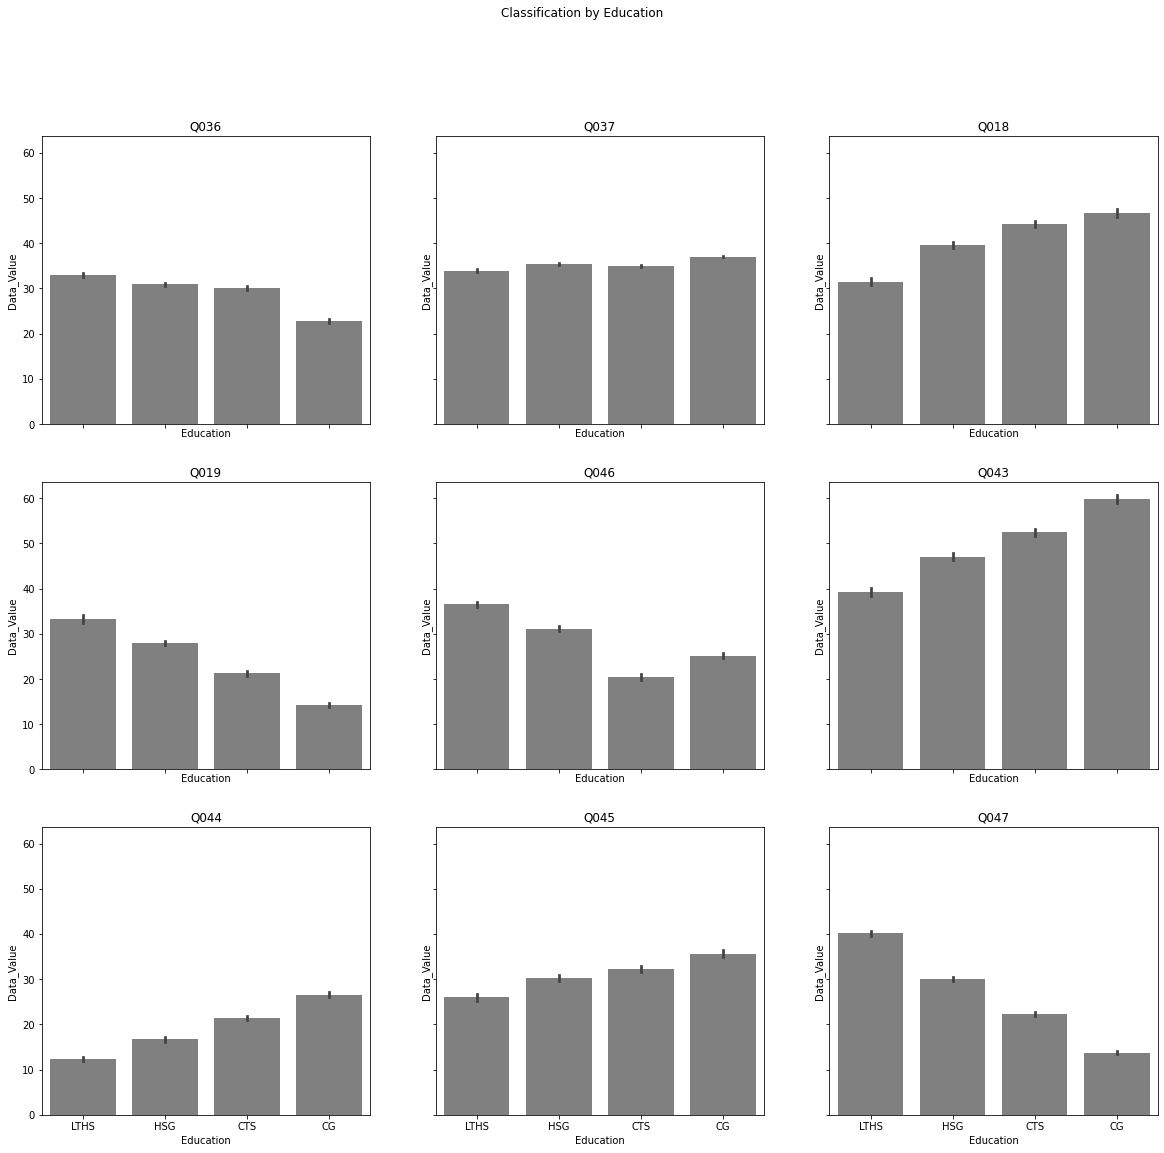

In [51]:
fig, axes = plt.subplots(3, 3, figsize=(20, 18), sharey=True, sharex=True)
fig.suptitle('Classification by Education');

k = 0
for i in range(3):
    if k >= questions_df.shape[0]:
        break
    for j in range(3):
        if k >= questions_df.shape[0]:
            break
        question_id = questions_df.iloc[[k]]['QuestionID'][k]
        sns.barplot(ax=axes[i][j], data=education_df[education_df['QuestionID']==question_id], x='Education', y='Data_Value', color='grey');
        axes[i][j].set_title(question_id);
        k += 1

> College graduates reported the least percentage of people who had obesity, while those with less than high education reported the highest percentages of people with obesity
>
> However, there seemed to be no clear disparity among people of the different levels of education by their overweight classification. In fact, college graduates reported slighlty higher percentages of overweight status.
>
> It is somewhat confounding that more college graduates confessed to be consuming fruits less than once daily than those from all the other levels of education. On the flipside, around 30% of people with less than high school education revealed that they consume veges less than once daily - almost twice the percentage of college graduates who reported to consume veges less than once daily.
>
> People with at least a college degree are also more likely to engage in moderate intensity or vigorous-intensity aerobics, although those with less than high school education were more likely to engage in leisure-time physical activity.

> Data values do not show any correlation to education level. Values for all education levels occur all across the spectrum.

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(20, 18), sharey=True, sharex=True)
fig.suptitle('Distribution of Values by Education');

k = 0
for i in range(3):
    if k >= questions_df.shape[0]:
        break
    for j in range(3):
        if k >= questions_df.shape[0]:
            break
        question_id = questions_df.iloc[[k]]['QuestionID'][k]
        sns.boxplot(ax=axes[i][j],x='Education', y='Data_Value', data=education_df[education_df['QuestionID']==question_id], whis=[0, 100], width=.6, color='grey')
        axes[i][j].set_title(question_id);
        k += 1

> Question Q037 had the smallest range of values, among all questions put forward.
>
> On the other hand, question Q047 had the largest range among the questions asked.
>
> People with less than high school education also provided more spread out values than people from any other education stratum.

In [ ]:
questions_df[questions_df['QuestionID'] == 'Q037']

In [ ]:
questions_df[questions_df['QuestionID'] == 'Q047']

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(20, 18), sharey=True, sharex=True)
fig.suptitle('Classification by Education');

k = 0
for i in range(3):
    if k >= questions_df.shape[0]:
        break
    for j in range(3):
        if k >= questions_df.shape[0]:
            break
        question_id = questions_df.iloc[[k]]['QuestionID'][k]
        sns.violinplot(ax=axes[i][j],x='Education', y='Data_Value', data=education_df[education_df['QuestionID']==question_id], split=True, color='grey');
        axes[i][j].set_title(question_id);
        k += 1

> That the values overlap suggests that the probability distributions of the of the values quoted by the respondents are very similar.

#### Stratitification by Age

In [ ]:
age_df = atomic_df[atomic_df['StratificationCategory1'] == 'Age (years)']
age_df.reset_index(drop=True, inplace=True)
age_df.head()

In [ ]:
age_df.shape

In [ ]:
age_df.isnull().sum().sort_values()

> As with the education dataframe, the other stratification columns need to be removed since they do not contain any information.

In [ ]:
age_df = age_df.drop(['Education', 'Income', 'Race/Ethnicity', 'Data_Value_Footnote', 'Gender', 'StratificationCategory1', 'Stratification1'], axis=1)
age_df.head()

In [ ]:
#Showing 9 subplots side by side, one for each question in the questions dataset and examining how people of different ages respond to them
#Bar plots are generally used to compare categorical data - in this case, how responses to the questions vary by age groups

fig, axes = plt.subplots(3, 3, figsize=(20, 18), sharey=True, sharex=True) #define the figure and axis that will be used for plotting
fig.suptitle('Classification by Age');

k = 0 # I used this variable to ensure that the plot does not burst the size questions, and plot a non existent dimension. Doing so will definitely throw an error
for i in range(3): # Lopping over 3 times, for the 3 rows in the subplots matrix
    if k >= questions_df.shape[0]: # stop the looping if all questions have been encountered
        break
    for j in range(3): # loop over each column in the subplot matrix
        if k >= questions_df.shape[0]: # stop the looping if all questions have been encountered
            break
        question_id = questions_df.iloc[[k]]['QuestionID'][k] #retrieve the ID of the each question, and assign it to the varibale question_id
        sns.barplot(ax=axes[i][j], data=age_df[age_df['QuestionID']==question_id], x='Age(years)', y='Data_Value', color='grey'); # draw the bar plot
        axes[i][j].set_title(question_id); # set the title of the subplot as the question ID
        k += 1 # increment 1, to ensure that the computation does not sink into an infinite loop

> People in the mid-years reported more cases of obesity then people in the lower and upper edges. The observation was, however, reversed when the respondents were asked whether they engage in muscle-strenghtening activities at least twice a week. People from the lower edges and upper edges (with respect to age) reported higher percentages than those in the mid-years. Whether these two observations are directly correlated makes for a good research question.
>
> A higher proportion of lower age adults (18-24) reported to perform either moderate-intensity or vigorous-intensity aerobics at least twice a week. Rather unsurprisingly, the percentage of people in the '65 or older' category who reported to not participate in leisure time physical activity was higher than any other age-group.

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(20, 18), sharey=True, sharex=True)
fig.suptitle('Distribution of Values by Age');

k = 0
for i in range(3):
    if k >= questions_df.shape[0]:
        break
    for j in range(3):
        if k >= questions_df.shape[0]:
            break
        question_id = questions_df.iloc[[k]]['QuestionID'][k]
        sns.boxplot(ax=axes[i][j],x='Age(years)', y='Data_Value', data=age_df[age_df['QuestionID']==question_id], whis=[0, 100], width=.6, color='grey')
        axes[i][j].set_title(question_id);
        k += 1

> Again, results for question Q037 were the least spread out
>
> However, questions Q046 and Q047 exhibited high range of values

In [ ]:
questions_df[questions_df['QuestionID'] == 'Q046']

In [ ]:
questions_df[questions_df['QuestionID'] == 'Q047']

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(20, 18), sharey=True, sharex=True)
fig.suptitle('Classification by Age');

k = 0
for i in range(3):
    if k >= questions_df.shape[0]:
        break
    for j in range(3):
        if k >= questions_df.shape[0]:
            break
        question_id = questions_df.iloc[[k]]['QuestionID'][k]
        sns.violinplot(ax=axes[i][j],x='Age(years)', y='Data_Value', data=age_df[age_df['QuestionID']==question_id], split=True, color='grey');
        axes[i][j].set_title(question_id);
        k += 1

> While answering Q046, respondents in the age group 25-34 were more likely to quote a higher value than any other age group

#### Classifiaction by Income

In [ ]:
income_df = atomic_df[atomic_df['StratificationCategory1'] == 'Income']
income_df.reset_index(drop=True, inplace=True)
income_df.head()

In [ ]:
income_df.shape

In [ ]:
income_df.isnull().sum().sort_values()

In [ ]:
income_df = income_df.drop(['Education', 'Age(years)', 'Race/Ethnicity', 'Data_Value_Footnote', 'Gender', 'StratificationCategory1', 'Stratification1'], axis=1)
income_df.head()

In [ ]:
income_df['Income'].unique()

In [ ]:
income_encoding = {'Income': {'Less than $15,000': 0, '$15,000 - $24,999': 1, '$25,000 - $34,999': 2, '$35,000 - $49,999': 3, '$50,000 - $74,999': 4,
                                   '$75,000 or greater': 5, 'Data not reported': 6}}
income_df = income_df.replace(income_encoding)
income_df.head()

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(20, 18), sharey=True, sharex=True)
fig.suptitle('Income classification');

k = 0
for i in range(3):
    if k >= questions_df.shape[0]:
        break
    for j in range(3):
        if k >= questions_df.shape[0]:
            break
        question_id = questions_df.iloc[[k]]['QuestionID'][k]
        sns.barplot(ax=axes[i][j], data=income_df[income_df['QuestionID']==question_id], x='Income', y='Data_Value', color='grey');
        axes[i][j].set_title(question_id);
        k += 1

> Over 30% of people in the lowest income band divluged that they consumed veges less than once daily. This is almost double the percentage of people in the  highest income band who also reported to consume veges less than once daily.
>
> The same pattern is seen when asked whether they participate in leisure time physical activities. Almost 40% of people in the lowest income band said they don't, compared to only 15% of people in the highest band who do not engage in leisure time physical activities.

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(20, 18), sharey=True, sharex=True)
fig.suptitle('Distribution of Values by Income');

k = 0
for i in range(3):
    if k >= questions_df.shape[0]:
        break
    for j in range(3):
        if k >= questions_df.shape[0]:
            break
        question_id = questions_df.iloc[[k]]['QuestionID'][k]
        sns.boxplot(ax=axes[i][j],x='Income', y='Data_Value', data=income_df[income_df['QuestionID']==question_id], whis=[0, 100], width=.6, color='grey')
        axes[i][j].set_title(question_id);
        k += 1

> Question Q037 returned values with the smallest range while the largest range of values was witnessed for question Q047

In [ ]:
questions_df[questions_df['QuestionID'] == 'Q047']

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(20, 18), sharey=True, sharex=True)
fig.suptitle('Classification by Income');

k = 0
for i in range(3):
    if k >= questions_df.shape[0]:
        break
    for j in range(3):
        if k >= questions_df.shape[0]:
            break
        question_id = questions_df.iloc[[k]]['QuestionID'][k]
        sns.violinplot(ax=axes[i][j],x='Income', y='Data_Value', data=income_df[income_df['QuestionID']==question_id], split=True, color='grey');
        axes[i][j].set_title(question_id);
        k += 1

> Despite the differences in income, the responses to the questions follow the same distribution.

#### Classification by Ethnicity

In [ ]:
race_df = atomic_df[atomic_df['StratificationCategory1'] == 'Race/Ethnicity']
race_df.reset_index(drop=True, inplace=True)
race_df.head()

In [ ]:
race_df.shape

In [ ]:
race_df.isnull().sum().sort_values()

In [ ]:
race_df = race_df.drop(['Education', 'Age(years)', 'Income', 'Data_Value_Footnote', 'Gender', 'StratificationCategory1', 'Stratification1'], axis=1)
race_df.head()

In [ ]:
race_df['Race/Ethnicity'].unique()

In [ ]:
race_encoding = {'Race/Ethnicity': {'Non-Hispanic White': 'NHW', 'Non-Hispanic Black': 'NHB', 'Hispanic': 'HIS', 'Asian': 'ASN', 'Hawaiian/Pacific Islander': 'HPI',
                                   'American Indian/Alaska Native': 'AI', '2 or more races': 'TWO', 'Other': 'Other'}}
race_df = race_df.replace(race_encoding)
race_df.head()

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(20, 18), sharey=True, sharex=True)
fig.suptitle('Classification by Race and Ethnicity');

k = 0
for i in range(3):
    if k >= questions_df.shape[0]:
        break
    for j in range(3):
        if k >= questions_df.shape[0]:
            break
        question_id = questions_df.iloc[[k]]['QuestionID'][k]
        sns.barplot(ax=axes[i][j], data=race_df[race_df['QuestionID']==question_id], x='Race/Ethnicity', y='Data_Value', color='grey');
        axes[i][j].set_title(question_id);
        k += 1

> There was not not much disticntion between the participating ethnic groups, based on how they answered the questions.
>
> The only conspicuous difference can be seen in Asians, who reported an unbelievably low percentage of obesity cases compared to other ethnic groups.

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(20, 18), sharey=True, sharex=True)
fig.suptitle('Distribution of Values by Race and Ethnicity');

k = 0
for i in range(3):
    if k >= questions_df.shape[0]:
        break
    for j in range(3):
        if k >= questions_df.shape[0]:
            break
        question_id = questions_df.iloc[[k]]['QuestionID'][k]
        sns.boxplot(ax=axes[i][j],x='Race/Ethnicity', y='Data_Value', data=race_df[race_df['QuestionID']==question_id], whis=[0, 100], width=.6, color='grey')
        axes[i][j].set_title(question_id);
        k += 1

> The range of values was very narrow for all the questions, and across the participating ethnic groups. Question Q036 witnessed the largest range, with percentages ranging from around 5% to 60%. 

In [ ]:
questions_df[questions_df['QuestionID'] == 'Q036']

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(20, 18), sharey=True, sharex=True)
fig.suptitle('Classification by Race/Ethnicity');

k = 0
for i in range(3):
    if k >= questions_df.shape[0]:
        break
    for j in range(3):
        if k >= questions_df.shape[0]:
            break
        question_id = questions_df.iloc[[k]]['QuestionID'][k]
        sns.violinplot(ax=axes[i][j],x='Race/Ethnicity', y='Data_Value', data=race_df[race_df['QuestionID']==question_id], split=True, color='grey');
        axes[i][j].set_title(question_id);
        k += 1

> Question Q036 represents an exit from the norm where values follow the same distribution. The distribution suggests that when asked whether they were obese, most Asians would probably not agree.

#### Classification by gender

In [ ]:
gender_df = atomic_df[atomic_df['StratificationCategory1'] == 'Gender']
gender_df.reset_index(drop=True, inplace=True)
gender_df.head()

In [ ]:
gender_df.dtypes

In [ ]:
gender_df.shape

In [ ]:
gender_df.isnull().sum().sort_values()

In [ ]:
gender_df = gender_df.drop(['Age(years)', 'Income', 'Race/Ethnicity', 'Data_Value_Footnote', 'Education', 'StratificationCategory1', 'Stratification1'], axis=1)
gender_df.head()

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(20, 18), sharey=True, sharex=True)
fig.suptitle('Gender classification');

k = 0
for i in range(3):
    if k >= questions_df.shape[0]:
        break
    for j in range(3):
        if k >= questions_df.shape[0]:
            break
        question_id = questions_df.iloc[[k]]['QuestionID'][k]
        sns.boxplot(ax=axes[i][j], x='Gender', y='Data_Value', data=gender_df[gender_df['QuestionID']==question_id], whis=[0, 100], width=.6, color='grey')
        axes[i][j].set_title(question_id);
        k += 1

> Question Q047 produced the largest range of values, while question Q037 produced the smallest range.

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(20, 18), sharey=True, sharex=True)
fig.suptitle('Gender classification');

k = 0
for i in range(3):
    if k >= questions_df.shape[0]:
        break
    for j in range(3):
        if k >= questions_df.shape[0]:
            break
        question_id = questions_df.iloc[[k]]['QuestionID'][k]
        sns.violinplot(ax=axes[i][j],x='Gender', y='Data_Value', data=gender_df[gender_df['QuestionID']==question_id], color='grey', split=True);
        axes[i][j].set_title(question_id);
        k += 1

> The violin plots suggest that values for males and females followed the same distribution, save for question Q037, for which values reported by males was a little bit higher than that reported by females.

In [ ]:
#The question in question is
questions_df[questions_df['QuestionID']=='Q037']

> This suggests that males, as compared to females, were more probable to admit to being overweight.

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(20, 18), sharey=True, sharex=True)
fig.suptitle('Gender classification');

k = 0
for i in range(3):
    if k >= questions_df.shape[0]:
        break
    for j in range(3):
        if k >= questions_df.shape[0]:
            break
        question_id = questions_df.iloc[[k]]['QuestionID'][k]
        sns.barplot(ax=axes[i][j], data=gender_df[gender_df['QuestionID']==question_id], x='Gender', y='Data_Value', color='grey');
        axes[i][j].set_title(question_id);
        k += 1

> A higher percentage of males was found to be overweight than females. However, a higher percentage of females than males disclosed that they consume fruit less than once daily.
>
> A higher percentage of males than females said they consume veges less than once daily. A higher percentage of males than females also reported to engage in muscle-strenghtening activities at least twice a week.